<a href="https://colab.research.google.com/github/adnaksbhat/Colab_JupyterNotebooks/blob/main/BH_ECN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECN_GT_All_WAB

##Graphs and visualization

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default visual style
sns.set(style="whitegrid")


In [15]:

file_path = '/content/ECN_GT_All_WAB.xlsx'
df = pd.read_excel(file_path)

df.head()


,ECN_CODE,ECN_TYPE,ECN_DESC,MFG_REVIEW,EXECUTION_TYPE,COSTING_PROJECTS,IMPACTED_ITEMS,SOLUTION_ITEMS,ECN_CREATOR_ID,ECN CREATOR NAME,...,REVIEWER_DECISION,REVIEWER_DEC_DATE,CLOSURE,DISPOSITION,MATURITY,CREATION_DATE,UPDATE_DATE,AGING,AGING GROUP,ECR OFFICE Name
0,CIS-033635,Scope Change Notice,1709039-41 Modifiche BOM,No,Internal,1709041,"M111Z8002_1709041/003,M111Z8002_1709040/003,M1...","M111Z8002_1709039/004,M111Z8002_1709041/005,M1...",503033706,NaN,...,NaN,NaT,Closed,Approved,Complete,2024-01-25,2024-01-25,268,>40,NaN
1,CIS-033699,Scope Change Notice,8844182 - Dummy addition,No,External,8844182,"M66508002_8844182/016,M66508002_8844182/012","M66508002_8844182/018,M66508002_8844182/017",503033706,NaN,...,APPROVE,2024-01-31,Closed,Approved,Complete,2024-01-30,2024-01-31,262,>40,NaN
2,CIS-033803,Scope Change Notice,Woodside Pluto 8840659-60-61-62,No,Internal,8840659,"M111F0019_8840659/001,M111F0019_8840660/001,M1...","M111F0019_8840660/003,M111F0019_8840661/003,M1...",212362330,NaN,...,NaN,NaT,Closed,Approved,Complete,2024-02-08,2024-02-09,253,>40,UPG
3,CIS-033860,Scope Change Notice,1709039;1709040;1709041 Add a Dummy,No,External,1709041,"M11108002_1709040/000,M11108002_1709039/000,M1...","M11108002_1709040/001,M11108002_1709041/001,M1...",503033706,NaN,...,APPROVE,2024-02-15,Closed,Approved,Complete,2024-02-15,2024-02-15,247,>40,NaN
4,CIS-033956,Scope Change Notice,Qatar GTG NFS- 1709039 - Dummy position change,No,Internal,1709039,"M680B0850_1709039/000,M68000951_1709041/000,M6...","M680B0850_1709041/001,M680B0850_1709039/001,M6...",503033706,NaN,...,NaN,NaT,Closed,Approved,Complete,2024-02-21,2024-02-21,240,>40,NaN


In [16]:
# Histogram of Aging

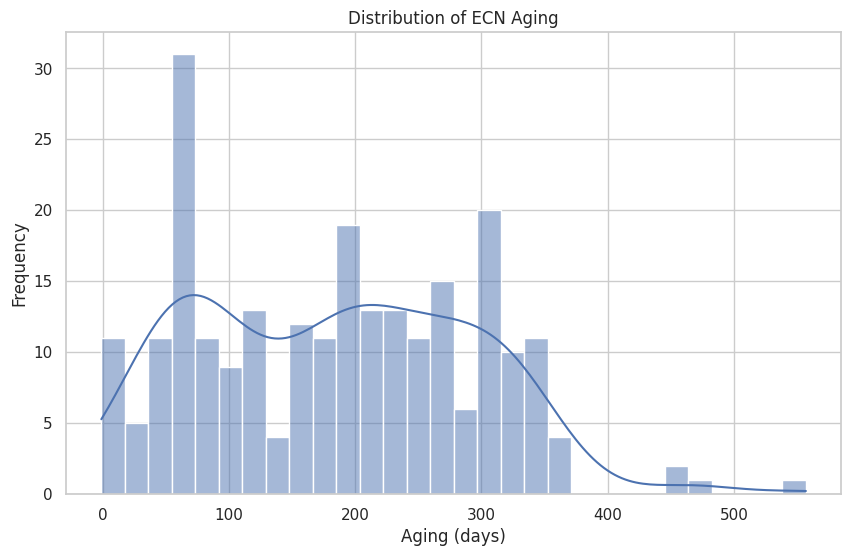

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AGING'], bins=30, kde=True)
plt.title('Distribution of ECN Aging')
plt.xlabel('Aging (days)')
plt.ylabel('Frequency')
plt.show()


In [18]:
# ==================

In [19]:
#Box Plot by Aging Group

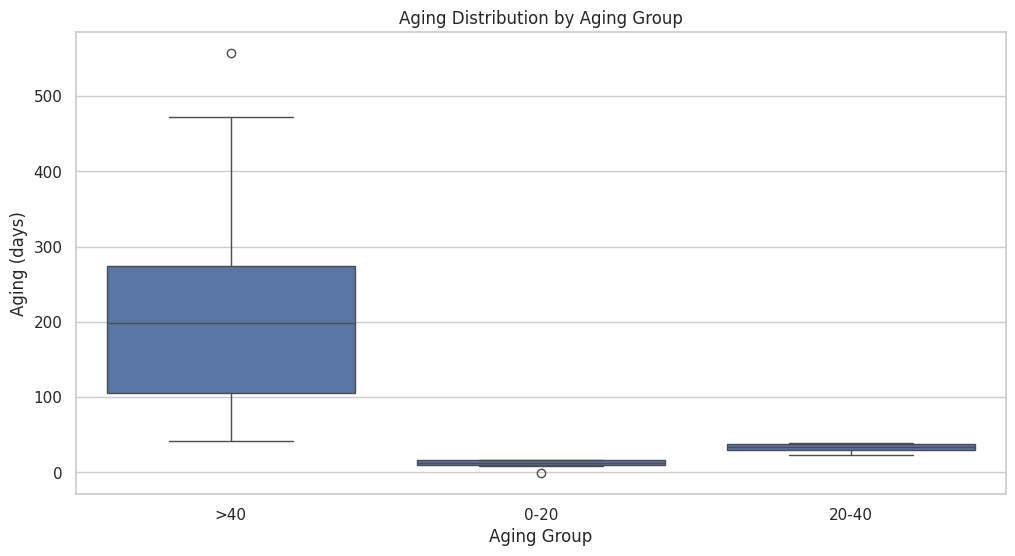

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGING GROUP', y='AGING', data=df)
plt.title('Aging Distribution by Aging Group')
plt.xlabel('Aging Group')
plt.ylabel('Aging (days)')
plt.show()


In [21]:
 #Pie Chart of Closure Status

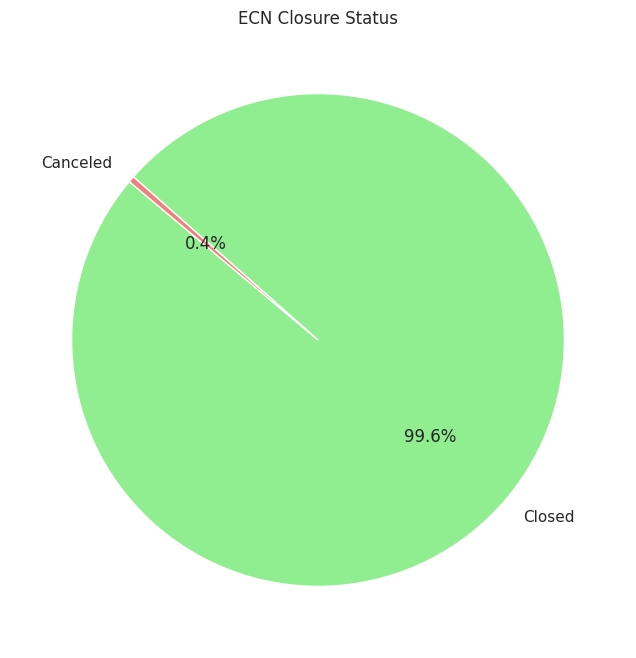

In [22]:
plt.figure(figsize=(8, 8))
closure_counts = df['CLOSURE'].value_counts()
plt.pie(closure_counts, labels=closure_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('ECN Closure Status')
plt.show()


In [23]:
# Stacked Bar Chart by ECN Type

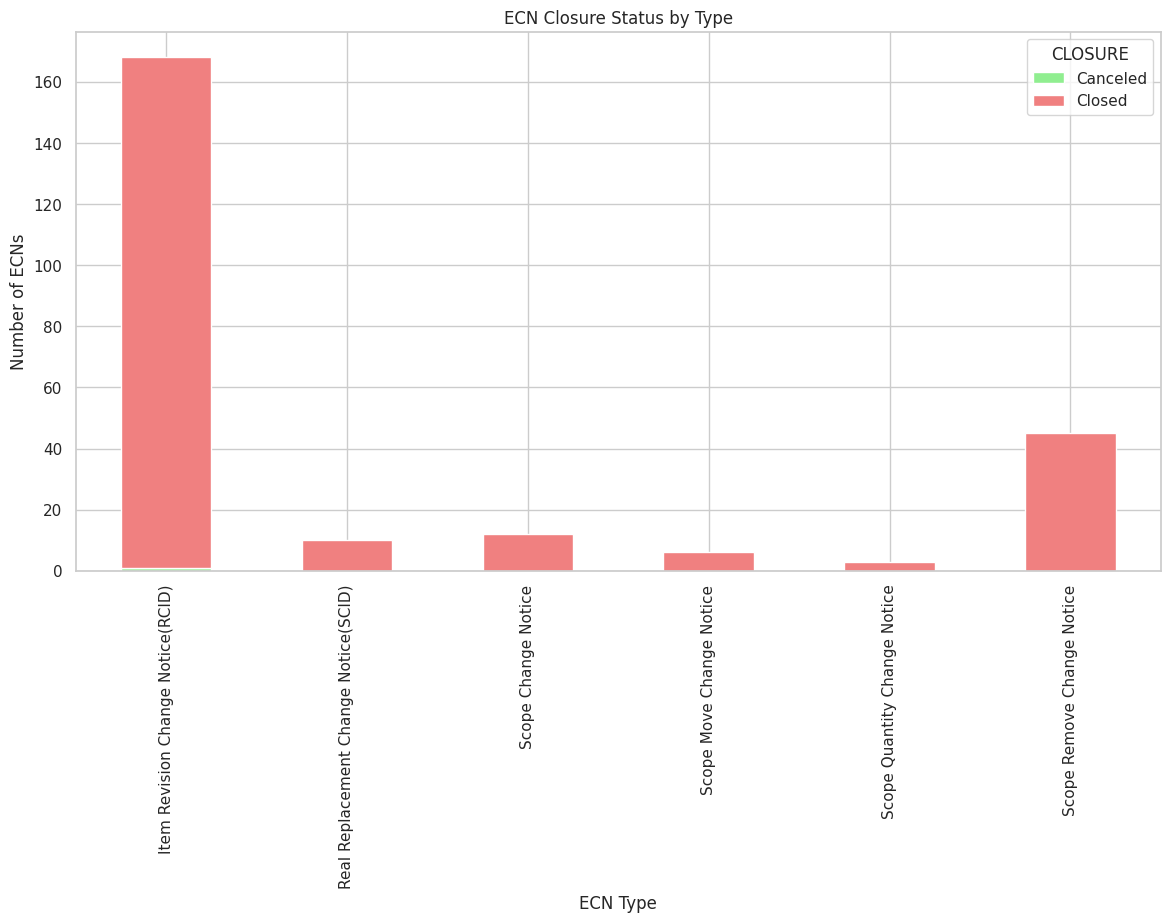

In [24]:
closure_by_type = df.groupby(['ECN_TYPE', 'CLOSURE']).size().unstack(fill_value=0)

closure_by_type.plot(kind='bar', stacked=True, figsize=(14, 7), color=['lightgreen', 'lightcoral'])
plt.title('ECN Closure Status by Type')
plt.xlabel('ECN Type')
plt.ylabel('Number of ECNs')
plt.show()


In [25]:
# Time Series Line Chart

<ipython-input-26-98cb61540aad>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  creation_trend = df.set_index('ECN_CREATION_DATE').resample('M').size()
<ipython-input-26-98cb61540aad>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  execution_trend = df.set_index('EXECUTION_DATE').resample('M').size()


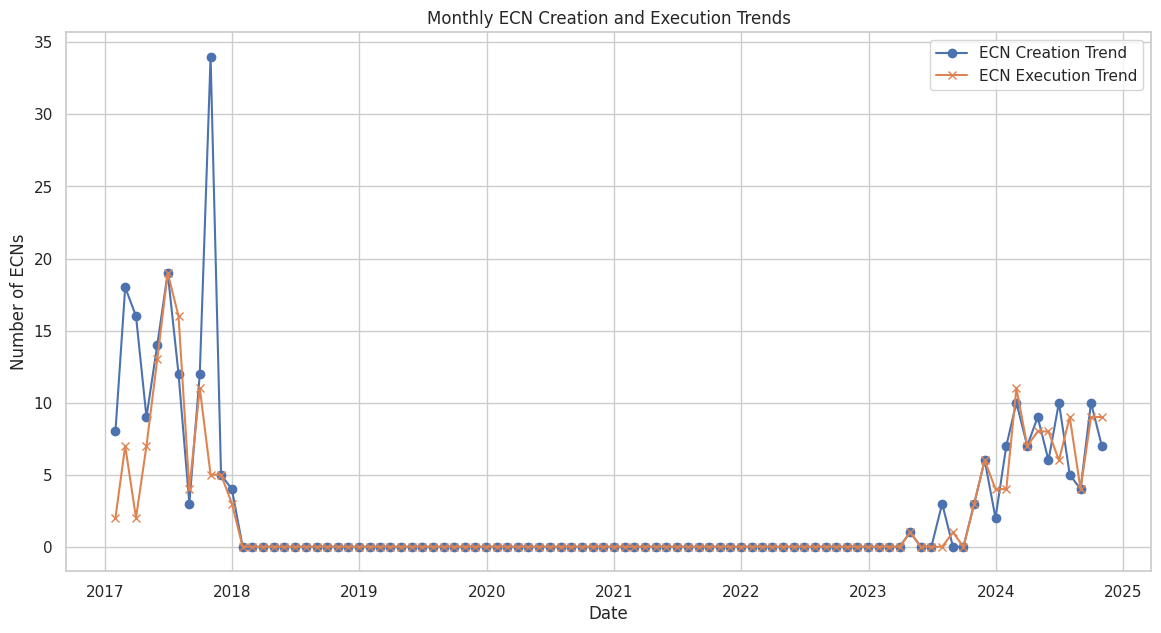

In [26]:
# Convert dates to datetime objects
df['ECN_CREATION_DATE'] = pd.to_datetime(df['ECN_CREATION_DATE'])
df['EXECUTION_DATE'] = pd.to_datetime(df['EXECUTION_DATE'])

# Group by month and count ECNs
creation_trend = df.set_index('ECN_CREATION_DATE').resample('M').size()
execution_trend = df.set_index('EXECUTION_DATE').resample('M').size()

plt.figure(figsize=(14, 7))
plt.plot(creation_trend, label='ECN Creation Trend', marker='o')
plt.plot(execution_trend, label='ECN Execution Trend', marker='x')
plt.title('Monthly ECN Creation and Execution Trends')
plt.xlabel('Date')
plt.ylabel('Number of ECNs')
plt.legend()
plt.show()


In [27]:
# Heatmap of ECNs by Month and Year

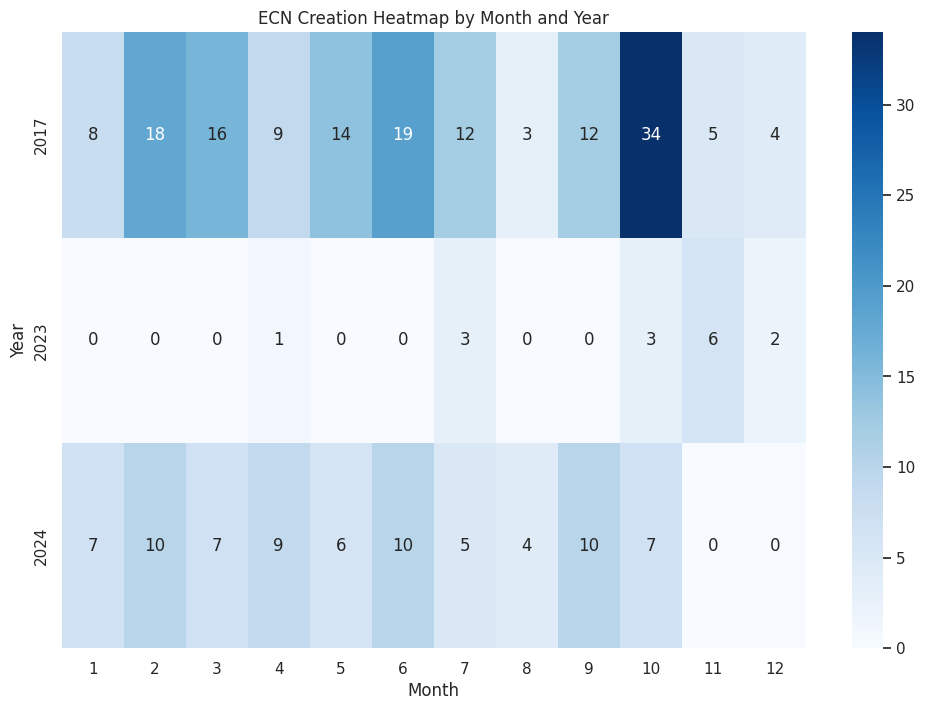

In [28]:
df['creation_month'] = df['ECN_CREATION_DATE'].dt.month
df['creation_year'] = df['ECN_CREATION_DATE'].dt.year

heatmap_data = df.pivot_table(index='creation_year', columns='creation_month', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.title('ECN Creation Heatmap by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [29]:
# Bar Chart for ECNs Reviewed by Each Reviewer

<ipython-input-30-777af5e487d0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviewer_counts.index, y=reviewer_counts.values, palette='viridis')


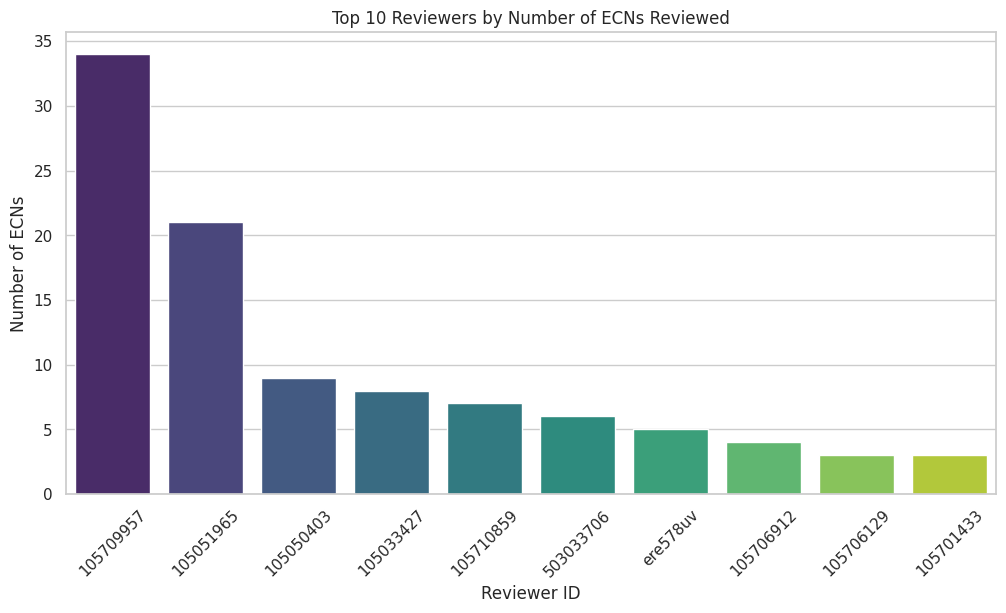

In [30]:
reviewer_counts = df['REVIEWER_ID'].value_counts().head(10)  # Top 10 reviewers

plt.figure(figsize=(12, 6))
sns.barplot(x=reviewer_counts.index, y=reviewer_counts.values, palette='viridis')
plt.title('Top 10 Reviewers by Number of ECNs Reviewed')
plt.xlabel('Reviewer ID')
plt.ylabel('Number of ECNs')
plt.xticks(rotation=45)
plt.show()


In [31]:
#  Bar Chart for Impacted Items

<ipython-input-32-819237b5a64c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='IMPACTED_ITEMS', data=df, order=df['IMPACTED_ITEMS'].value_counts().index, palette='coolwarm')


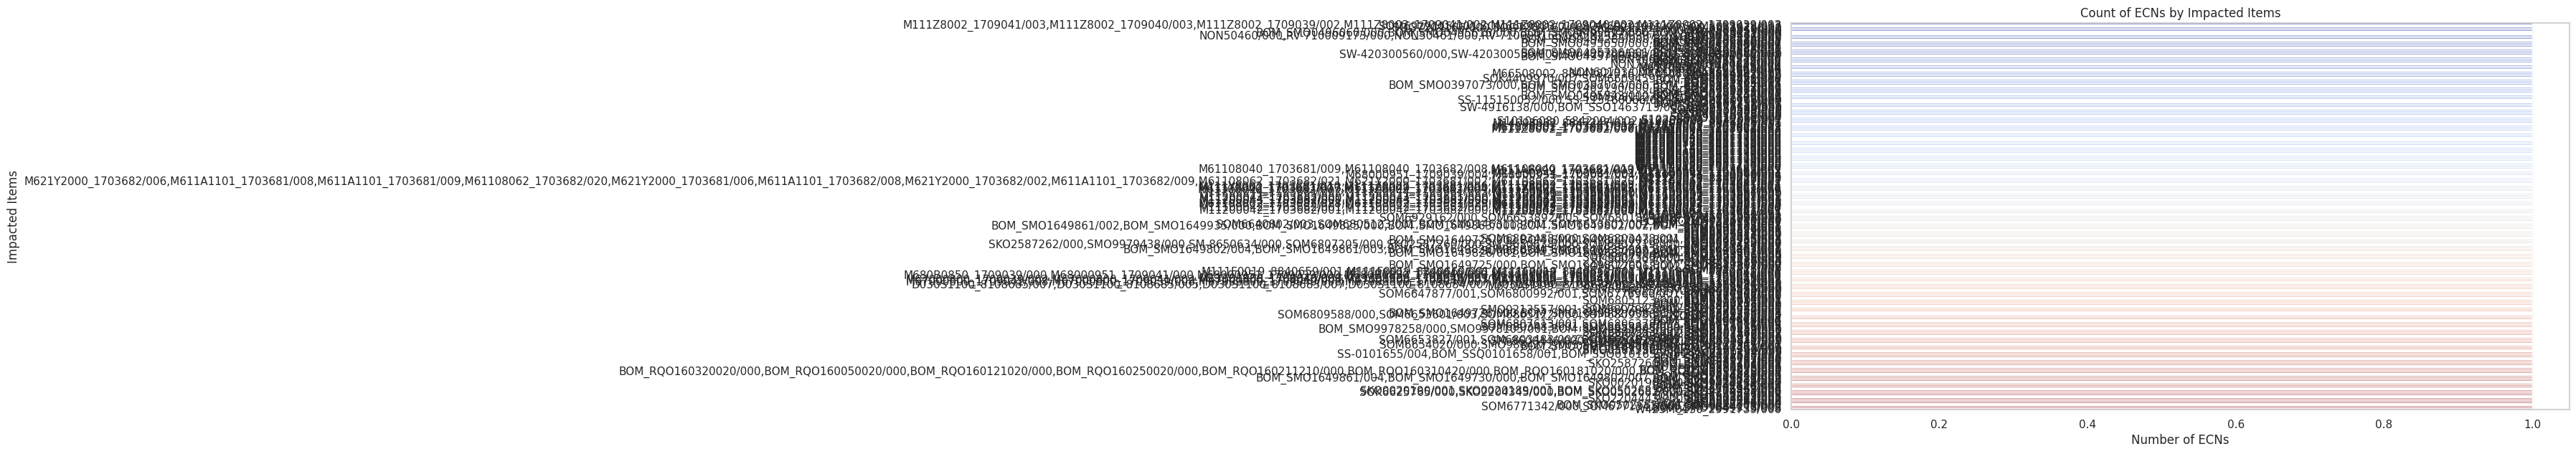

In [32]:
plt.figure(figsize=(14, 7))
sns.countplot(y='IMPACTED_ITEMS', data=df, order=df['IMPACTED_ITEMS'].value_counts().index, palette='coolwarm')
plt.title('Count of ECNs by Impacted Items')
plt.xlabel('Number of ECNs')
plt.ylabel('Impacted Items')
plt.show()


In [33]:
# Bar Chart of Execution to Review Duration

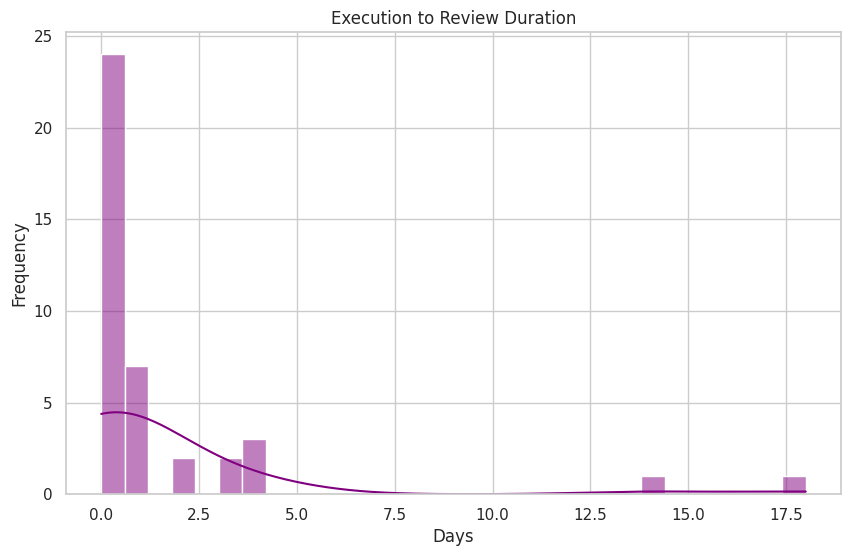

In [34]:
df['execution_to_review_duration'] = (pd.to_datetime(df['REVIEWER_DEC_DATE']) - df['EXECUTION_DATE']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df['execution_to_review_duration'], bins=30, kde=True, color='purple')
plt.title('Execution to Review Duration')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


In [35]:
# Pie Chart for Reviewer Decisions

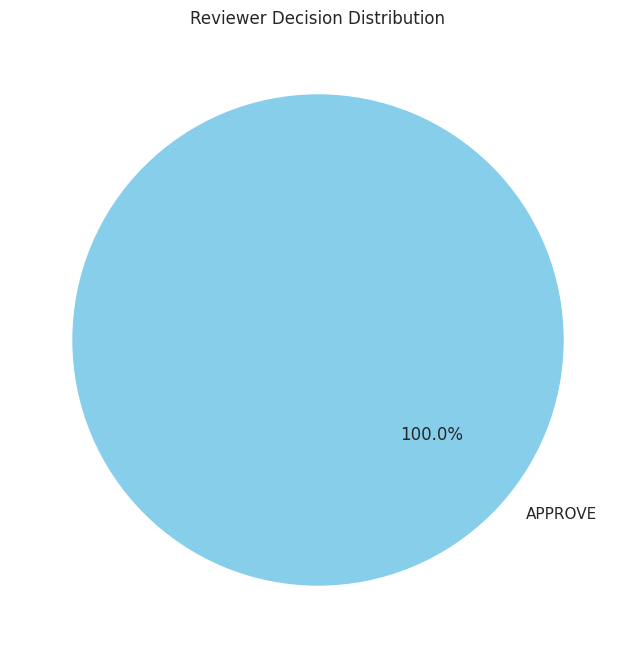

In [36]:
plt.figure(figsize=(8, 8))
decision_counts = df['REVIEWER_DECISION'].value_counts()
plt.pie(decision_counts, labels=decision_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'gold'])
plt.title('Reviewer Decision Distribution')
plt.show()


##Data preprocessing and Model building

In [43]:
pd.set_option('display.max_columns', None)

In [44]:
df.head()

,ECN_CODE,ECN_DESC,MFG_REVIEW,EXECUTION_TYPE,COSTING_PROJECTS,IMPACTED_ITEMS,SOLUTION_ITEMS,ECN_CREATOR_ID,ECN CREATOR NAME,ECN CREATOR SUPERVISOR SSO,ECN CREATOR SUPERVISOR NAME,ECN CREATOR SUPERVISOR OFFICE,ECN_CREATION_DATE,EXECUTOR_ID,ECN EXECUTOR NAME,ECN EXECUTOR OFFICE,ECN EXECUTOR SUPERVISOR SSO,ECN EXECUTOR SUPERVISOR NAME,ECN EXECUTOR SUPERVISOR OFFICE,EXECUTION_DATE,REVIEWER_ID,ECN REVIEWER NAME,ECN REVIEWER OFFICE,ECN REVIEWER SUPERVISOR SSO,ECN REVIEWER SUPERVISOR NAME,ECN REVIEWER SUPERVISOR OFFICE,REVIEWER_DEC_DATE,DISPOSITION,MATURITY,CREATION_DATE,UPDATE_DATE,AGING,AGING GROUP,ECR OFFICE Name,creation_month,creation_year,execution_to_review_duration,creation_to_execution,execution_to_review,total_lifecycle_duration,ECN_TYPE_Real Replacement Change Notice(SCID),ECN_TYPE_Scope Change Notice,ECN_TYPE_Scope Move Change Notice,ECN_TYPE_Scope Quantity Change Notice,ECN_TYPE_Scope Remove Change Notice,CLOSURE_Closed,ECN CREATOR OFFICE_OG TPS-ENG-Controls & Electronics System Engineering,ECN CREATOR OFFICE_OG TPS-ENG-Gas Turbine Solutions Auxiliary Engineering,ECN CREATOR OFFICE_OG TPS-MFG-TM Massa Plant String Test,ECN CREATOR OFFICE_OG-ENG-POL-RM-TM-ASE Auxiliary Systems Engineering,ECN CREATOR OFFICE_OG-ENG-RM-PSE-OPE-PRJDOC Project Docs
0,CIS-033635,1709039-41 Modifiche BOM,No,Internal,1709041,"M111Z8002_1709041/003,M111Z8002_1709040/003,M1...","M111Z8002_1709039/004,M111Z8002_1709041/005,M1...",503033706,NaN,NaN,NaN,NaN,2024-01-25,503033706,NaN,NaN,NaN,NaN,NaN,2024-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Approved,Complete,2024-01-25,2024-01-25,0.773554,>40,NaN,1,2024,NaN,-0.471363,NaN,-0.421018,False,True,False,False,False,True,False,False,False,False,False
1,CIS-033699,8844182 - Dummy addition,No,External,8844182,"M66508002_8844182/016,M66508002_8844182/012","M66508002_8844182/018,M66508002_8844182/017",503033706,NaN,NaN,NaN,NaN,2024-01-30,503261539,NaN,NaN,NaN,NaN,NaN,2024-01-31,503033706,NaN,NaN,NaN,NaN,NaN,2024-01-31,Approved,Complete,2024-01-30,2024-01-31,0.718286,>40,NaN,1,2024,0.0,-0.437364,-0.427936,-0.386979,False,True,False,False,False,True,False,False,False,False,False
2,CIS-033803,Woodside Pluto 8840659-60-61-62,No,Internal,8840659,"M111F0019_8840659/001,M111F0019_8840660/001,M1...","M111F0019_8840660/003,M111F0019_8840661/003,M1...",212362330,NaN,NaN,NaN,NaN,2024-02-08,212362330,NaN,NaN,NaN,NaN,NaN,2024-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Approved,Complete,2024-02-08,2024-02-09,0.635385,>40,UPG,2,2024,NaN,-0.437364,NaN,-0.386979,False,True,False,False,False,True,False,False,False,False,False
3,CIS-033860,1709039;1709040;1709041 Add a Dummy,No,External,1709041,"M11108002_1709040/000,M11108002_1709039/000,M1...","M11108002_1709040/001,M11108002_1709041/001,M1...",503033706,NaN,NaN,NaN,NaN,2024-02-15,503261539,NaN,NaN,NaN,NaN,NaN,2024-02-15,503033706,NaN,NaN,NaN,NaN,NaN,2024-02-15,Approved,Complete,2024-02-15,2024-02-15,0.580118,>40,NaN,2,2024,0.0,-0.471363,-0.427936,-0.421018,False,True,False,False,False,True,False,False,False,False,False
4,CIS-033956,Qatar GTG NFS- 1709039 - Dummy position change,No,Internal,1709039,"M680B0850_1709039/000,M68000951_1709041/000,M6...","M680B0850_1709041/001,M680B0850_1709039/001,M6...",503033706,NaN,NaN,NaN,NaN,2024-02-21,503033706,NaN,NaN,NaN,NaN,NaN,2024-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Approved,Complete,2024-02-21,2024-02-21,0.515640,>40,NaN,2,2024,NaN,-0.471363,NaN,-0.421018,False,True,False,False,False,True,False,False,False,False,False


In [45]:

df['AGING'].fillna(df['AGING'].median(), inplace=True)



<ipython-input-45-d856306aa72e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AGING'].fillna(df['AGING'].median(), inplace=True)


In [46]:
df['AGING GROUP'].unique()

array(['>40', '0-20', '20-40'], dtype=object)

In [47]:
#do label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['AGING GROUP'] = label_encoder.fit_transform(df['AGING GROUP'])

In [54]:
df['execution_to_review_duration'].fillna(df['execution_to_review_duration'].median(), inplace=True)

<ipython-input-54-b0bead78b075>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['execution_to_review_duration'].fillna(df['execution_to_review_duration'].median(), inplace=True)


In [56]:
df['creation_to_execution'].fillna(df['creation_to_execution'].median(), inplace=True)

<ipython-input-56-9978fbe516cd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['creation_to_execution'].fillna(df['creation_to_execution'].median(), inplace=True)


In [ ]:
df['creation_to_execution'].fillna(df['creation_to_execution'].median(), inplace=True)

In [59]:
#modified syntax
df.fillna({'execution_to_review' : df['creation_to_execution'].median()}, inplace=True)

In [60]:
df.fillna({'total_lifecycle_duration' : df['total_lifecycle_duration'].median()}, inplace=True)

In [ ]:

df.fillna("Unknown", inplace=True)

In [38]:
# Duration features
df['creation_to_execution'] = (pd.to_datetime(df['EXECUTION_DATE']) - pd.to_datetime(df['ECN_CREATION_DATE'])).dt.days
df['execution_to_review'] = (pd.to_datetime(df['REVIEWER_DEC_DATE']) - pd.to_datetime(df['EXECUTION_DATE'])).dt.days
df['total_lifecycle_duration'] = (pd.to_datetime(df['UPDATE_DATE']) - pd.to_datetime(df['ECN_CREATION_DATE'])).dt.days

# Month and year extraction
df['creation_month'] = pd.to_datetime(df['ECN_CREATION_DATE']).dt.month
df['creation_year'] = pd.to_datetime(df['ECN_CREATION_DATE']).dt.year


In [39]:
# Example: One-Hot Encoding
df = pd.get_dummies(df, columns=['ECN_TYPE', 'CLOSURE', 'REVIEWER_DECISION', 'ECN CREATOR OFFICE'], drop_first=True)


In [40]:
# Standardize or normalize numerical features to ensure they are on the same scale.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['AGING', 'creation_to_execution', 'execution_to_review', 'total_lifecycle_duration']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
'''
Predicting ECN Closure Status
Objective: Predict whether an ECN will be closed or remain open based on its characteristics (e.g., type, creator office, aging, maturity).
Model Type: Classification (Closed vs. Open).
'''

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df.drop(columns=['CLOSURE'])  # Drop target column
y = df['CLOSURE'].apply(lambda x: 1 if x == 'Closed' else 0)  # Binary encoding

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


KeyError: "['CLOSURE'] not found in axis"

In [ ]:
'''
Predicting Reviewer Decision
Objective: Predict whether a review decision will be "Approve," "Reject," or other categories based on the ECN characteristics.
Model Type: Multiclass Classification.
'''

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

# Encode the target variable
le = LabelEncoder()
df['REVIEWER_DECISION_ENCODED'] = le.fit_transform(df['REVIEWER_DECISION'])

# Define features and target
X = df.drop(columns=['REVIEWER_DECISION', 'REVIEWER_DECISION_ENCODED'])
y = df['REVIEWER_DECISION_ENCODED']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = gb_clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


In [ ]:
'''
Regression Analysis for Aging Prediction
Objective: Predict the number of days (AGING) an ECN will take to close.
Model Type: Regression.
'''

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop(columns=['AGING'])
y = df['AGING']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R^2 Score: {r2_score(y_test, y_pred):.2f}')


In [ ]:
'''
Clustering for Grouping ECNs
Objective: Group similar ECNs together based on characteristics such as type, aging, and impacted items.
Model Type: Clustering (unsupervised learning).
'''

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
features = ['AGING', 'IMPACTED_ITEMS', 'MATURITY']
df_cluster = df[features]

# Standardize the features
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['AGING'], y=df['IMPACTED_ITEMS'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Clustering of ECNs')
plt.xlabel('Aging (days)')
plt.ylabel('Impacted Items')
plt.legend(title='Cluster')
plt.show()
